In [11]:
import pandas as pd
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from helpers.utils import CustomImageDataset

### The next cell is taking a sample of 9 labels from .csv file

In [12]:
sample = [1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385]
training_labels = pd.read_csv('data/boneage-training-dataset.csv')
training_labels = training_labels[training_labels['id'].isin(sample)]

In [13]:
transformer = transforms.Compose([
  transforms.ToTensor(),
  # transforms.Normalize((0.5, 0.5))
])

# Using custom dataset to load images 
training_dataset = CustomImageDataset(
  root_dir='data/processed/sample', labels=training_labels, transform=transformer
)

batch_size = 3
# prepared dataloader for neural network (note it is using batch size of 3, just for this sample)
dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)

1380 120 True
1381 82 False
1379 94 False
1382 138 True
1385 36 True
1383 150 True
1378 12 False
1377 180 False
1384 156 True


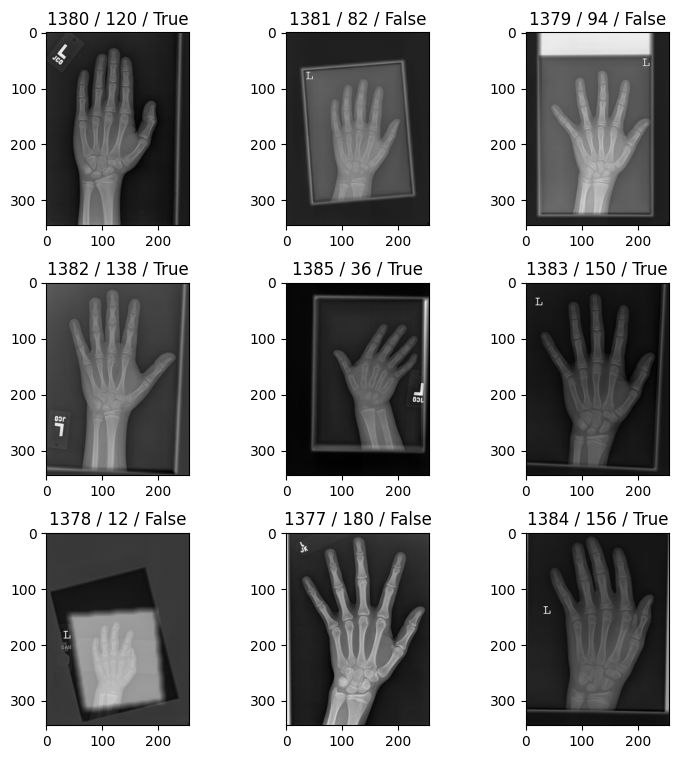

In [14]:
# Creates a 3 by 3 plot for dispalying images
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
fig.subplots_adjust(wspace=0.1, hspace=0.3)
i = 0

# Loops through data loader
for batch in dataloader:
  # Loops thorough each batch
  for idx in range(batch_size):
    # Accessing features of the batch at each index
    image = batch[0][idx]
    age = batch[1][idx]
    gender = batch[2][idx]
    img_id = batch[3][idx]

    # Displaying images on the grid
    axis[i][idx].imshow(image.squeeze(), cmap='gray')
    axis[i][idx].set_title(f"{img_id} / {age} / {gender}")
  i += 1